#### Import Library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
import matplotlib.dates as mdates
import matplotlib.rcsetup

#### Load Dataset

In [2]:
df = pd.read_csv("Data Historis BBRI Jan 2018 - Des 2023.csv")

df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,29/12/2023,5.725,5.75,5.750,5.675,"93,13M","0,00%"
1,28/12/2023,5.725,5.70,5.750,5.675,"121,43M","1,78%"
2,27/12/2023,5.625,5.70,5.725,5.625,"131,37M","-0,88%"
3,22/12/2023,5.675,5.65,5.700,5.600,"109,41M","1,79%"
4,21/12/2023,5.575,5.55,5.600,5.525,"99,05M","0,45%"
...,...,...,...,...,...,...,...
1454,08/01/2018,3.590,3.59,3.590,3.560,"54,56M","0,00%"
1455,05/01/2018,3.590,3.55,3.590,3.520,"87,10M","1,13%"
1456,04/01/2018,3.550,3.61,3.610,3.460,"156,41M","-1,66%"
1457,03/01/2018,3.610,3.63,3.630,3.560,"70,15M","-0,55%"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     1459 non-null   object 
 1   Terakhir    1459 non-null   float64
 2   Pembukaan   1459 non-null   float64
 3   Tertinggi   1459 non-null   float64
 4   Terendah    1459 non-null   float64
 5   Vol.        1459 non-null   object 
 6   Perubahan%  1459 non-null   object 
dtypes: float64(4), object(3)
memory usage: 79.9+ KB


#### Merubah Tipe Data Tanggal ( Datetime )

In [4]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

C:\Users\Vivo Design\AppData\Local\Temp\ipykernel_3080\3225071182.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df['Tanggal'])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     1459 non-null   datetime64[ns]
 1   Terakhir    1459 non-null   float64       
 2   Pembukaan   1459 non-null   float64       
 3   Tertinggi   1459 non-null   float64       
 4   Terendah    1459 non-null   float64       
 5   Vol.        1459 non-null   object        
 6   Perubahan%  1459 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 79.9+ KB


#### Merubah Isi Didalam Kolom Vol.

In [6]:
df['Vol.'] = df['Vol.'].str.replace('M','')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     1459 non-null   datetime64[ns]
 1   Terakhir    1459 non-null   float64       
 2   Pembukaan   1459 non-null   float64       
 3   Tertinggi   1459 non-null   float64       
 4   Terendah    1459 non-null   float64       
 5   Vol.        1459 non-null   object        
 6   Perubahan%  1459 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 79.9+ KB


In [8]:
df['Vol.'] = pd.Series(df['Vol.']).convert_dtypes(convert_floating=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     1459 non-null   datetime64[ns]
 1   Terakhir    1459 non-null   float64       
 2   Pembukaan   1459 non-null   float64       
 3   Tertinggi   1459 non-null   float64       
 4   Terendah    1459 non-null   float64       
 5   Vol.        1459 non-null   string        
 6   Perubahan%  1459 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1), string(1)
memory usage: 79.9+ KB


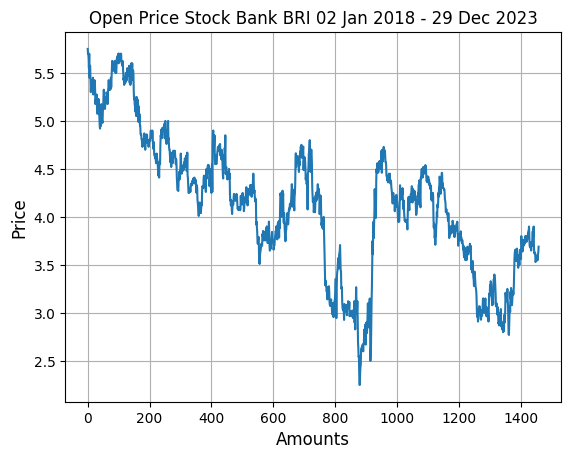

In [10]:
font = {'size': 12}
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)

df['Pembukaan'].plot()
plt.title('Open Price Stock Bank BRI 02 Jan 2018 - 29 Dec 2023',fontdict=font)
plt.xlabel('Amounts',fontdict=font)
plt.ylabel('Price',fontdict=font)
plt.grid()
plt.show()

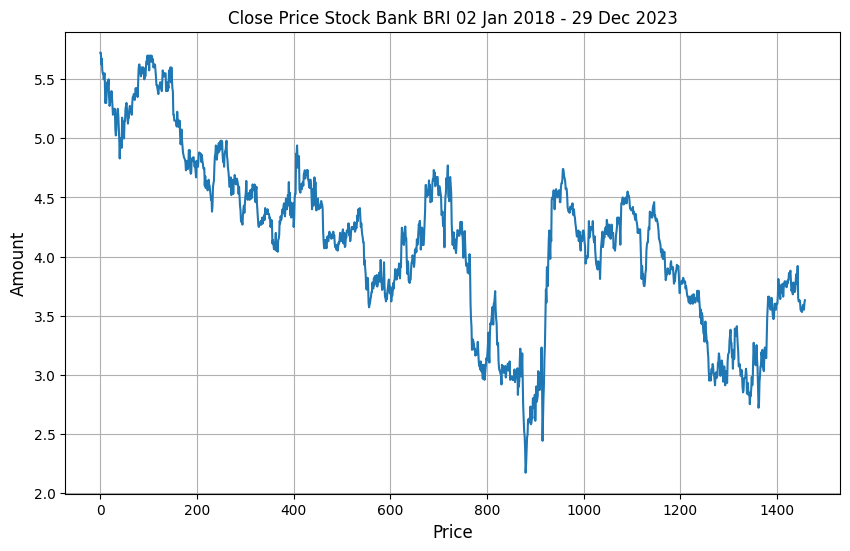

In [11]:
font = {'size': 12}
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)


df['Terakhir'].plot(figsize=(10,6))
plt.title('Close Price Stock Bank BRI 02 Jan 2018 - 29 Dec 2023',fontdict=font)
plt.xlabel('Price',fontdict=font)
plt.ylabel('Amount',fontdict=font)
plt.grid()
plt.show()

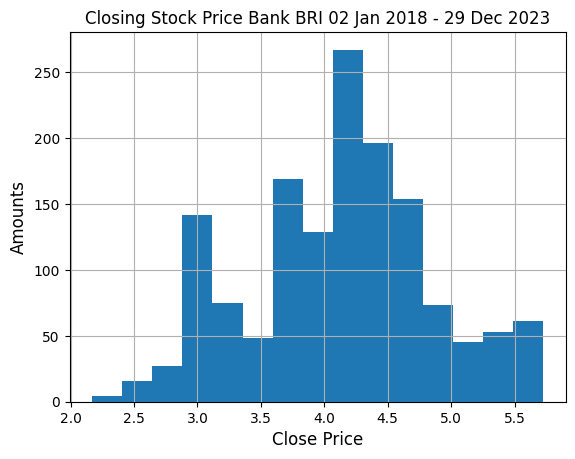

In [12]:
font = {'size': 12}
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)



df['Terakhir'].hist(bins=15)
plt.title('Closing Stock Price Bank BRI 02 Jan 2018 - 29 Dec 2023',fontdict=font)
plt.ylabel('Amounts',fontdict=font)
plt.xlabel('Close Price',fontdict=font)
plt.show()

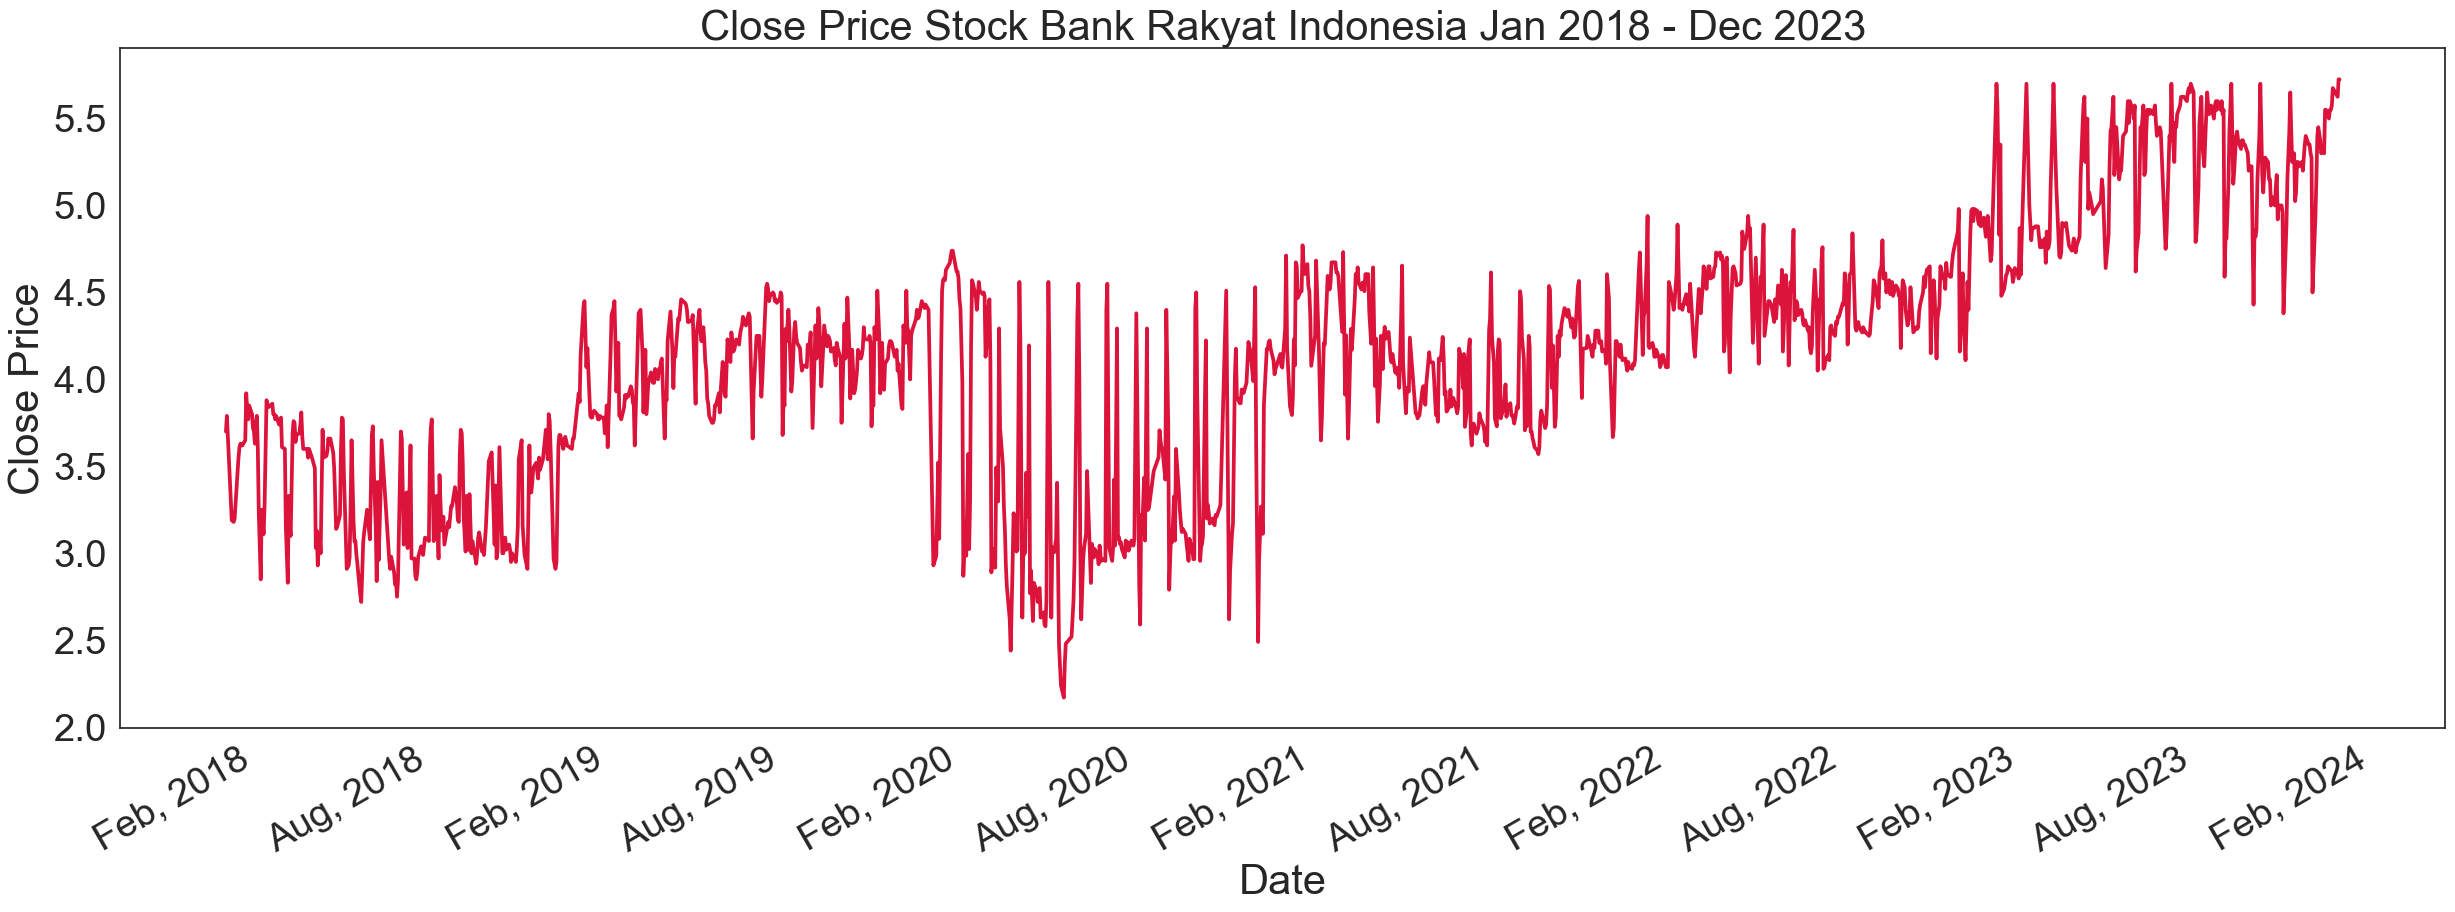

In [14]:
import seaborn as sns

half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
month_year_formatter = mdates.DateFormatter('%b, %Y')
    
fig,ax = plt.subplots(figsize=(30,10))
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.xaxis.set_major_formatter(month_year_formatter)
    
fig.autofmt_xdate()
    
sns.lineplot(x=df['Tanggal'],y=df['Terakhir'],data=df,linestyle='solid',color='crimson',linewidth=2.7).set(title='Close Price Stock Bank Rakyat Indonesia Jan 2018 - Dec 2023',xlabel='Date',ylabel='Close Price')
sns.set_theme(style='white',font_scale=2.5)

#### Diagram Korelatif

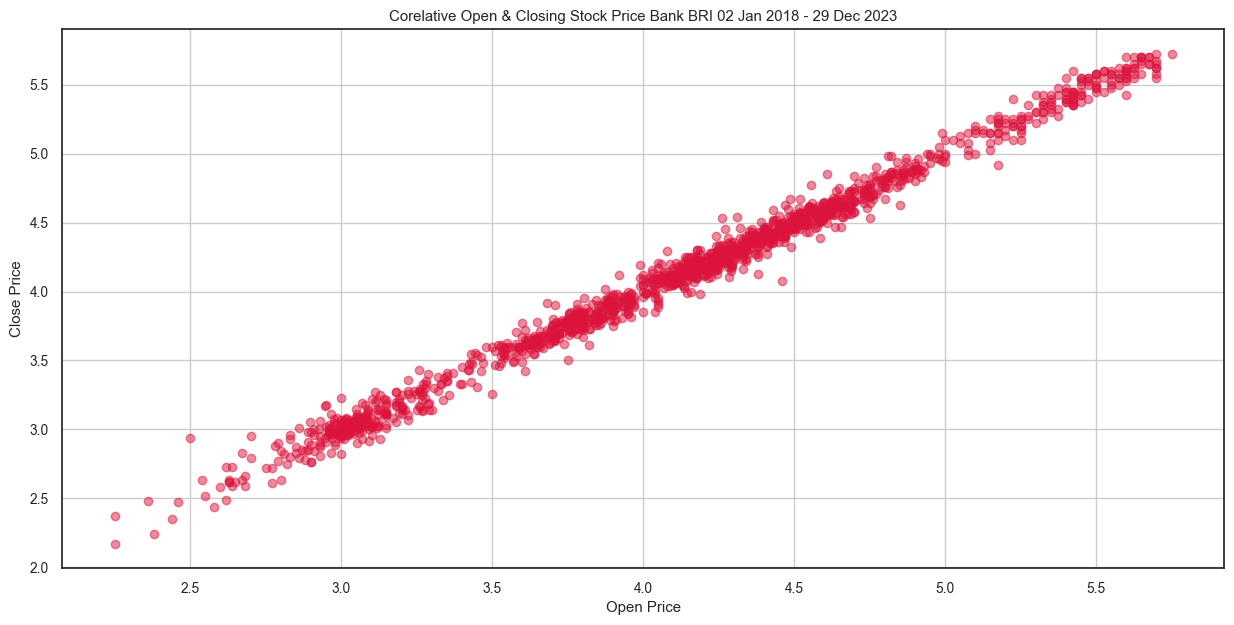

In [15]:
plt.figure(figsize=(15,7))
sns.set_theme(style='white',font_scale=0.9)

plt.scatter(x=df['Pembukaan'],y=df['Terakhir'], c='crimson',alpha=0.5)
plt.title('Corelative Open & Closing Stock Price Bank BRI 02 Jan 2018 - 29 Dec 2023')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)

plt.show()

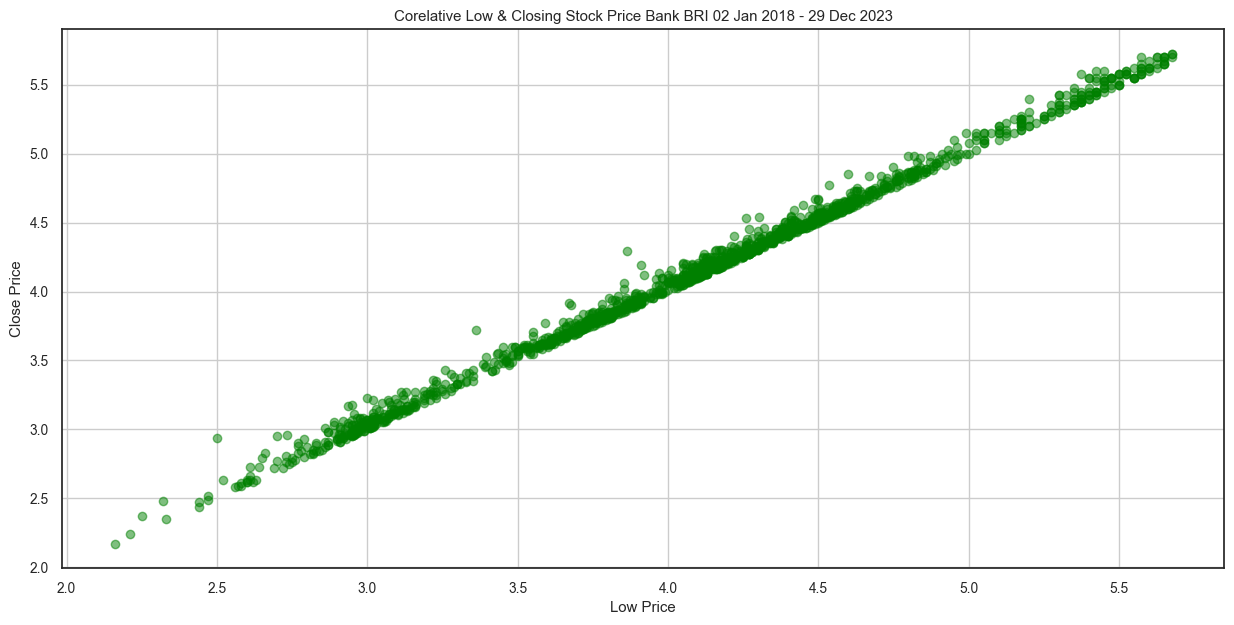

In [16]:
plt.figure(figsize=(15,7))
sns.set_theme(style='white',font_scale=0.9)

plt.scatter(x=df['Terendah'],y=df['Terakhir'], c='green',alpha=0.5)
plt.title('Corelative Low & Closing Stock Price Bank BRI 02 Jan 2018 - 29 Dec 2023')
plt.xlabel('Low Price')
plt.ylabel('Close Price')
plt.grid(True)

plt.show()

In [17]:
df['Vol.'] = df['Vol.'].str.replace(',','.')

In [18]:
df['Vol.'] = df['Vol.'].astype('float')

In [19]:
df['Perubahan%'] = df['Perubahan%'].str.replace('%','')
df['Perubahan%'] = df['Perubahan%'].str.replace(',','.')
df['Perubahan%'] = df['Perubahan%'].astype('float')

In [20]:
df['Perubahan%']

0       0.00
1       1.78
2      -0.88
3       1.79
4       0.45
        ... 
1454    0.00
1455    1.13
1456   -1.66
1457   -0.55
1458   -0.27
Name: Perubahan%, Length: 1459, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     1459 non-null   datetime64[ns]
 1   Terakhir    1459 non-null   float64       
 2   Pembukaan   1459 non-null   float64       
 3   Tertinggi   1459 non-null   float64       
 4   Terendah    1459 non-null   float64       
 5   Vol.        1459 non-null   float64       
 6   Perubahan%  1459 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 79.9 KB


In [22]:
df['Deviasi'] = df['Pembukaan'] - df['Terakhir']

df['Deviasi']

0       0.025
1      -0.025
2       0.075
3      -0.025
4      -0.025
        ...  
1454    0.000
1455   -0.040
1456    0.060
1457    0.020
1458    0.060
Name: Deviasi, Length: 1459, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     1459 non-null   datetime64[ns]
 1   Terakhir    1459 non-null   float64       
 2   Pembukaan   1459 non-null   float64       
 3   Tertinggi   1459 non-null   float64       
 4   Terendah    1459 non-null   float64       
 5   Vol.        1459 non-null   float64       
 6   Perubahan%  1459 non-null   float64       
 7   Deviasi     1459 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 91.3 KB


In [24]:
df.isnull().sum()

Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
Deviasi       0
dtype: int64

In [25]:
df.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Deviasi
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,4.121035,4.125487,4.169469,4.074988,147.305387,0.052454,0.004452
std,0.722447,0.720790,0.718761,0.723558,87.738843,2.084472,0.069814
min,2.170000,2.250000,2.270000,2.160000,27.680000,-7.810000,-0.440000
25%,3.664000,3.680000,3.718500,3.629500,91.580000,-0.975000,-0.039000
50%,4.180000,4.180000,4.220000,4.130000,123.840000,0.000000,0.000000
75%,4.560000,4.570000,4.610000,4.520000,173.800000,1.035000,0.049000
max,5.725000,5.750000,5.750000,5.675000,872.610000,20.490000,0.381000


#### Cek Duplikasi

In [26]:
df.duplicated().sum()

0

In [27]:
df['Return'] = df['Deviasi']/df['Terakhir']

df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Deviasi,Return
0,2023-12-29,5.725,5.75,5.750,5.675,93.13,0.00,0.025,0.004367
1,2023-12-28,5.725,5.70,5.750,5.675,121.43,1.78,-0.025,-0.004367
2,2023-12-27,5.625,5.70,5.725,5.625,131.37,-0.88,0.075,0.013333
3,2023-12-22,5.675,5.65,5.700,5.600,109.41,1.79,-0.025,-0.004405
4,2023-12-21,5.575,5.55,5.600,5.525,99.05,0.45,-0.025,-0.004484
...,...,...,...,...,...,...,...,...,...
1454,2018-08-01,3.590,3.59,3.590,3.560,54.56,0.00,0.000,0.000000
1455,2018-05-01,3.590,3.55,3.590,3.520,87.10,1.13,-0.040,-0.011142
1456,2018-04-01,3.550,3.61,3.610,3.460,156.41,-1.66,0.060,0.016901
1457,2018-03-01,3.610,3.63,3.630,3.560,70.15,-0.55,0.020,0.005540


In [28]:
df


,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Deviasi,Return
0,2023-12-29,5.725,5.75,5.750,5.675,93.13,0.00,0.025,0.004367
1,2023-12-28,5.725,5.70,5.750,5.675,121.43,1.78,-0.025,-0.004367
2,2023-12-27,5.625,5.70,5.725,5.625,131.37,-0.88,0.075,0.013333
3,2023-12-22,5.675,5.65,5.700,5.600,109.41,1.79,-0.025,-0.004405
4,2023-12-21,5.575,5.55,5.600,5.525,99.05,0.45,-0.025,-0.004484
...,...,...,...,...,...,...,...,...,...
1454,2018-08-01,3.590,3.59,3.590,3.560,54.56,0.00,0.000,0.000000
1455,2018-05-01,3.590,3.55,3.590,3.520,87.10,1.13,-0.040,-0.011142
1456,2018-04-01,3.550,3.61,3.610,3.460,156.41,-1.66,0.060,0.016901
1457,2018-03-01,3.610,3.63,3.630,3.560,70.15,-0.55,0.020,0.005540


C:\Users\Vivo Design\AppData\Local\Temp\ipykernel_3080\2625283454.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, linewidths=.5)


<AxesSubplot: >

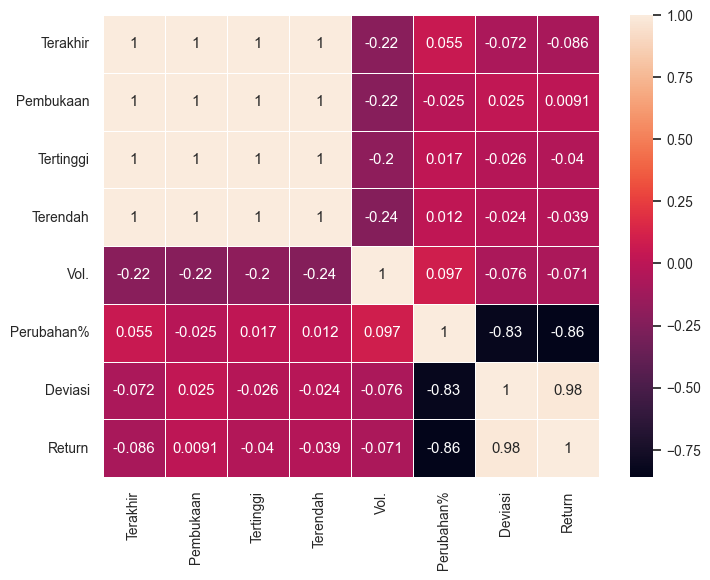

In [29]:
import seaborn as sns

plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, linewidths=.5)

#### Uji Normalitas Dengan Plot

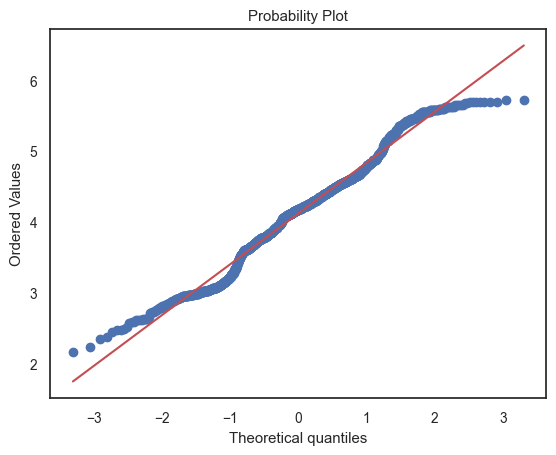

In [30]:
import pylab
import scipy.stats as stats

stats.probplot(df['Terakhir'], dist="norm", plot=pylab)
pylab.show()

#### Feature Engineering

In [31]:
df['Hari'] = df['Tanggal'].dt.day
df['Bulan'] = df['Tanggal'].dt.month
df['Tahun'] = df['Tanggal'].dt.year

C:\Users\Vivo Design\AppData\Local\Temp\ipykernel_21932\2625283454.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, linewidths=.5)


<AxesSubplot: >

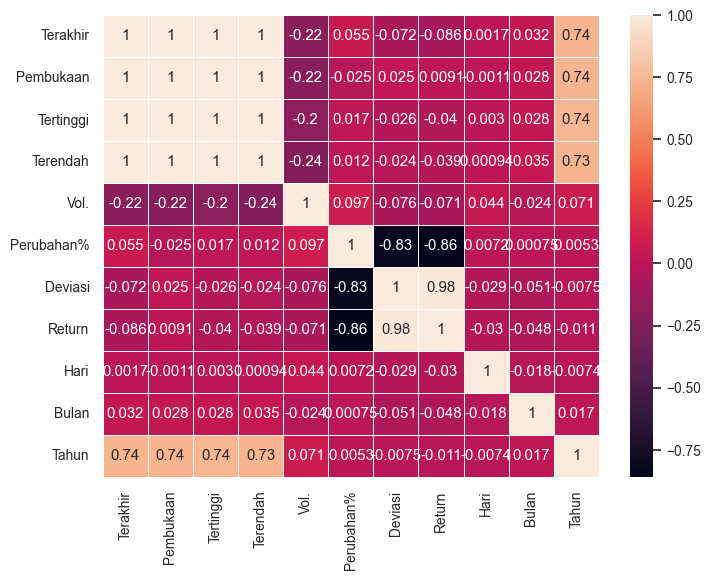

In [282]:
import seaborn as sns

plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, linewidths=.5)

#### Pemodelan Linear Regresi

#### Splitting Dataset

In [32]:
X = df.iloc[:,2:5]
Y = df.iloc[:,1]

In [33]:
print('Variabel Independen/X\n',X)

Variabel Independen/X
       Pembukaan  Tertinggi  Terendah
0          5.75      5.750     5.675
1          5.70      5.750     5.675
2          5.70      5.725     5.625
3          5.65      5.700     5.600
4          5.55      5.600     5.525
...         ...        ...       ...
1454       3.59      3.590     3.560
1455       3.55      3.590     3.520
1456       3.61      3.610     3.460
1457       3.63      3.630     3.560
1458       3.69      3.720     3.610

[1459 rows x 3 columns]


In [34]:
print('Variabel Dependen/Y\n',Y)

Variabel Dependen/Y
 0       5.725
1       5.725
2       5.625
3       5.675
4       5.575
        ...  
1454    3.590
1455    3.590
1456    3.550
1457    3.610
1458    3.630
Name: Terakhir, Length: 1459, dtype: float64


In [35]:
X = np.array(X)
X

array([[5.75 , 5.75 , 5.675],
       [5.7  , 5.75 , 5.675],
       [5.7  , 5.725, 5.625],
       ...,
       [3.61 , 3.61 , 3.46 ],
       [3.63 , 3.63 , 3.56 ],
       [3.69 , 3.72 , 3.61 ]])

In [36]:
Y = np.array(Y)
Y

array([5.725, 5.725, 5.625, ..., 3.55 , 3.61 , 3.63 ])

In [37]:
Y = Y.reshape(-1,1)

Y

array([[5.725],
       [5.725],
       [5.625],
       ...,
       [3.55 ],
       [3.61 ],
       [3.63 ]])

#### Normalisasi Data

In [38]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_X = min_max_scaler.fit_transform(X)
scaled_Y = min_max_scaler.fit_transform(Y)

print('Data X setelah dinormalisasi\n',scaled_X)
print('Data Y setelah dinormalisasi\n',scaled_Y)

Data X setelah dinormalisasi
 [[1.         1.         1.        ]
 [0.98571429 1.         1.        ]
 [0.98571429 0.99281609 0.98577525]
 ...
 [0.38857143 0.38505747 0.36984353]
 [0.39428571 0.3908046  0.39829303]
 [0.41142857 0.41666667 0.41251778]]
Data Y setelah dinormalisasi
 [[1.        ]
 [1.        ]
 [0.9718706 ]
 ...
 [0.38818565]
 [0.40506329]
 [0.41068917]]


In [39]:
type(scaled_X)

numpy.ndarray

In [40]:
X_scaled = scaled_X.reshape(-1)
X_scaled

array([1.        , 1.        , 1.        , ..., 0.41142857, 0.41666667,
       0.41251778])

In [41]:
len(X)

1459

In [42]:
Y_scaled = scaled_Y.reshape(-1)
Y_scaled

array([1.        , 1.        , 0.9718706 , ..., 0.38818565, 0.40506329,
       0.41068917])

In [43]:
len(Y)

1459

In [44]:
X = X.reshape(-1)

X

array([5.75 , 5.75 , 5.675, ..., 3.69 , 3.72 , 3.61 ])

In [45]:
Y = Y.reshape(-1)

Y

array([5.725, 5.725, 5.625, ..., 3.55 , 3.61 , 3.63 ])

In [46]:
data_df_x = {'Default var. X':X,'Norm. var X':X_scaled}

data_x = pd.DataFrame(data_df_x)

data_x.head()

,Default var. X,Norm. var X
0,5.750,1.000000
1,5.750,1.000000
2,5.675,1.000000
3,5.700,0.985714
4,5.750,1.000000


In [47]:
data_df_y = {'Default var. Y':Y,'Norm. var Y':Y_scaled}
data_y = pd.DataFrame(data_df_y)

data_y.head()

,Default var. Y,Norm. var Y
0,5.725,1.000000
1,5.725,1.000000
2,5.625,0.971871
3,5.675,0.985935
4,5.575,0.957806


#### Modelling

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(scaled_X,scaled_Y,random_state=40,test_size=0.30)
regresor = LinearRegression()
regresor.fit(xtrain,ytrain)

LinearRegression()

In [49]:
xtrain.shape

(1021, 3)

In [50]:
ytrain.shape

(1021, 1)

In [51]:
xtest.shape

(438, 3)

In [52]:
ytest.shape

(438, 1)

In [53]:
y_estimasi = regresor.predict(xtest)

y_estimasi

array([[0.79896769],
       [0.53703268],
       [0.42318899],
       [0.45937091],
       [0.85345258],
       [0.67560058],
       [0.1771492 ],
       [0.2997938 ],
       [0.95888109],
       [0.485118  ],
       [0.45197611],
       [0.61577942],
       [0.58477087],
       [0.1401593 ],
       [0.62509274],
       [0.47899413],
       [0.63604944],
       [0.97669429],
       [0.48733283],
       [0.34585566],
       [0.60747297],
       [0.62551614],
       [0.52285912],
       [0.73013553],
       [0.49075881],
       [0.69181577],
       [0.69546625],
       [0.19687328],
       [0.50427674],
       [0.99590196],
       [0.56978862],
       [0.43172752],
       [0.77764078],
       [0.68147362],
       [0.37702638],
       [0.72884448],
       [0.41648711],
       [0.96884618],
       [0.44558483],
       [0.32407665],
       [0.56444761],
       [0.61192121],
       [0.24854498],
       [0.55542163],
       [0.53558702],
       [0.45542368],
       [0.40711045],
       [0.373

In [54]:
ytest

array([[0.79606188],
       [0.53727145],
       [0.41912799],
       [0.4556962 ],
       [0.83825598],
       [0.66104079],
       [0.17158931],
       [0.30942335],
       [0.93670886],
       [0.4838256 ],
       [0.45175809],
       [0.61350211],
       [0.59437412],
       [0.12658228],
       [0.62728551],
       [0.47819972],
       [0.63009845],
       [0.96483826],
       [0.49507736],
       [0.3488045 ],
       [0.61322082],
       [0.62165963],
       [0.53445851],
       [0.7257384 ],
       [0.4838256 ],
       [0.697609  ],
       [0.68213783],
       [0.204782  ],
       [0.48945148],
       [0.99296765],
       [0.56540084],
       [0.42700422],
       [0.77918425],
       [0.68635724],
       [0.37412096],
       [0.72855134],
       [0.41068917],
       [0.9718706 ],
       [0.4556962 ],
       [0.31223629],
       [0.56962025],
       [0.61603376],
       [0.25682138],
       [0.54571027],
       [0.53445851],
       [0.45850914],
       [0.40787623],
       [0.298

#### Denormalisasi Nilai Prediksi

In [55]:
inversed_scaled_Y_test = min_max_scaler.inverse_transform(ytest)

inversed_scaled_Y_test

array([[5.   ],
       [4.08 ],
       [3.66 ],
       [3.79 ],
       [5.15 ],
       [4.52 ],
       [2.78 ],
       [3.27 ],
       [5.5  ],
       [3.89 ],
       [3.776],
       [4.351],
       [4.283],
       [2.62 ],
       [4.4  ],
       [3.87 ],
       [4.41 ],
       [5.6  ],
       [3.93 ],
       [3.41 ],
       [4.35 ],
       [4.38 ],
       [4.07 ],
       [4.75 ],
       [3.89 ],
       [4.65 ],
       [4.595],
       [2.898],
       [3.91 ],
       [5.7  ],
       [4.18 ],
       [3.688],
       [4.94 ],
       [4.61 ],
       [3.5  ],
       [4.76 ],
       [3.63 ],
       [5.625],
       [3.79 ],
       [3.28 ],
       [4.195],
       [4.36 ],
       [3.083],
       [4.11 ],
       [4.07 ],
       [3.8  ],
       [3.62 ],
       [3.23 ],
       [4.23 ],
       [2.79 ],
       [5.15 ],
       [4.176],
       [5.075],
       [4.49 ],
       [4.59 ],
       [4.13 ],
       [2.58 ],
       [4.31 ],
       [4.16 ],
       [4.54 ],
       [4.1  ],
       [4.595],
       [

In [56]:
inversed_scaled_Y_Estimasi = min_max_scaler.inverse_transform(y_estimasi)

inversed_scaled_Y_Estimasi

array([[5.01033015],
       [4.07915119],
       [3.67443686],
       [3.80306358],
       [5.20402394],
       [4.57176005],
       [2.79976541],
       [3.23576698],
       [5.57882227],
       [3.8945945 ],
       [3.77677508],
       [4.35909585],
       [4.24886044],
       [2.66826632],
       [4.3922047 ],
       [3.87282413],
       [4.43115577],
       [5.6421482 ],
       [3.90246821],
       [3.39951688],
       [4.3295664 ],
       [4.39370987],
       [4.02876415],
       [4.76563179],
       [3.91464757],
       [4.62940506],
       [4.64238253],
       [2.86988451],
       [3.96270383],
       [5.71043145],
       [4.19559855],
       [3.70479133],
       [4.93451296],
       [4.59263873],
       [3.51032879],
       [4.76104213],
       [3.65061166],
       [5.61424816],
       [3.75405405],
       [3.3220925 ],
       [4.17661125],
       [4.34537991],
       [3.05357739],
       [4.14452388],
       [4.07401187],
       [3.7890312 ],
       [3.61727767],
       [3.497

In [57]:
inversed_scaled_Y_Estimasi = inversed_scaled_Y_Estimasi.reshape(-1)
inversed_scaled_Y_Estimasi

array([5.01033015, 4.07915119, 3.67443686, 3.80306358, 5.20402394,
       4.57176005, 2.79976541, 3.23576698, 5.57882227, 3.8945945 ,
       3.77677508, 4.35909585, 4.24886044, 2.66826632, 4.3922047 ,
       3.87282413, 4.43115577, 5.6421482 , 3.90246821, 3.39951688,
       4.3295664 , 4.39370987, 4.02876415, 4.76563179, 3.91464757,
       4.62940506, 4.64238253, 2.86988451, 3.96270383, 5.71043145,
       4.19559855, 3.70479133, 4.93451296, 4.59263873, 3.51032879,
       4.76104213, 3.65061166, 5.61424816, 3.75405405, 3.3220925 ,
       4.17661125, 4.34537991, 3.05357739, 4.14452388, 4.07401187,
       3.7890312 , 3.61727767, 3.49763806, 4.20011407, 2.759853  ,
       5.11304089, 4.15577651, 5.04999673, 4.47113426, 4.55217666,
       4.14131173, 2.58783159, 4.35017138, 4.18977967, 4.55396361,
       4.0643651 , 4.60950499, 4.41102855, 5.59713241, 4.49389461,
       4.21447773, 3.52158526, 2.98761647, 4.72270679, 3.88116754,
       2.79647105, 4.54677752, 3.8269713 , 3.8284681 , 2.62630

In [58]:
inversed_scaled_Y_test = inversed_scaled_Y_test.reshape(-1)
inversed_scaled_Y_test

array([5.   , 4.08 , 3.66 , 3.79 , 5.15 , 4.52 , 2.78 , 3.27 , 5.5  ,
       3.89 , 3.776, 4.351, 4.283, 2.62 , 4.4  , 3.87 , 4.41 , 5.6  ,
       3.93 , 3.41 , 4.35 , 4.38 , 4.07 , 4.75 , 3.89 , 4.65 , 4.595,
       2.898, 3.91 , 5.7  , 4.18 , 3.688, 4.94 , 4.61 , 3.5  , 4.76 ,
       3.63 , 5.625, 3.79 , 3.28 , 4.195, 4.36 , 3.083, 4.11 , 4.07 ,
       3.8  , 3.62 , 3.23 , 4.23 , 2.79 , 5.15 , 4.176, 5.075, 4.49 ,
       4.59 , 4.13 , 2.58 , 4.31 , 4.16 , 4.54 , 4.1  , 4.595, 4.43 ,
       5.575, 4.459, 4.215, 3.6  , 3.   , 4.71 , 3.86 , 2.81 , 4.53 ,
       3.776, 3.8  , 2.62 , 5.175, 4.4  , 4.4  , 5.   , 4.156, 5.55 ,
       4.61 , 4.53 , 4.67 , 3.77 , 4.53 , 4.556, 3.6  , 3.8  , 5.425,
       3.13 , 4.58 , 3.6  , 4.38 , 3.73 , 4.49 , 4.63 , 4.16 , 3.73 ,
       5.725, 4.3  , 5.625, 3.034, 4.52 , 2.97 , 4.57 , 4.43 , 3.75 ,
       3.424, 3.893, 5.6  , 2.72 , 4.11 , 4.85 , 4.17 , 5.375, 5.325,
       5.15 , 4.62 , 4.56 , 2.956, 3.66 , 4.45 , 3.99 , 5.65 , 4.77 ,
       4.4  , 4.74 ,

In [59]:
data_pred = {'Prediction Price':inversed_scaled_Y_Estimasi,'Actual Price':inversed_scaled_Y_test}
comparing = pd.DataFrame(data_pred)

comparing.head()

,Prediction Price,Actual Price
0,5.010330,5.00
1,4.079151,4.08
2,3.674437,3.66
3,3.803064,3.79
4,5.204024,5.15


#### Evaluasi Model R2 Score

In [60]:
print('Nilai R2 Score : ',r2_score(ytest,regresor.predict(xtest))*100)

Nilai R2 Score :  99.77872054265258


#### Evaluasi Mean Absolute Percentage Error ( MAPE )

In [61]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

print('Nilai MAPE : ',mean_absolute_percentage_error(y_true=inversed_scaled_Y_test, y_pred=inversed_scaled_Y_Estimasi))
print('Nilai MSE : ',mean_squared_error(y_true=inversed_scaled_Y_test, y_pred=inversed_scaled_Y_Estimasi))

Nilai MAPE :  0.00614317335690318
Nilai MSE :  0.0011622027170798592


In [62]:
from math import sqrt

print('Nilai RMSE : ',sqrt(mean_squared_error(y_true=inversed_scaled_Y_test, y_pred=inversed_scaled_Y_Estimasi)))

Nilai RMSE :  0.034091094395455525


#### Visualisasi Diagram

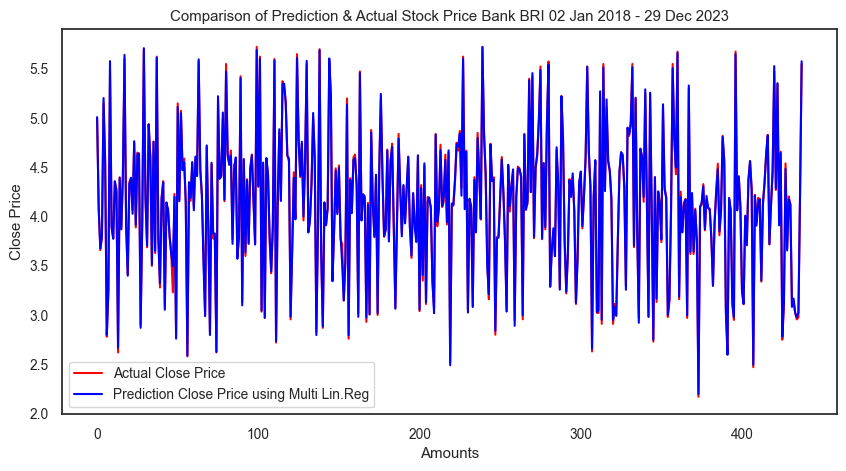

In [63]:
plt.figure(figsize=(10,5))
plt.plot(inversed_scaled_Y_test,color='red',label='Actual Close Price')
plt.plot(inversed_scaled_Y_Estimasi,color='blue',label='Prediction Close Price using Multi Lin.Reg')
plt.xlabel('Amounts')
plt.ylabel('Close Price')
plt.legend()
plt.title('Comparison of Prediction & Actual Stock Price Bank BRI 02 Jan 2018 - 29 Dec 2023')

plt.show()

#### Tes prediksi harga penutupan saham

In [64]:
prediksi_uji_harga = regresor.predict(([[5.750,5.100,4.980]]))

print('Harga prediksi penutupan saham : ',prediksi_uji_harga[0][0])

Harga prediksi penutupan saham :  4.549741397319498


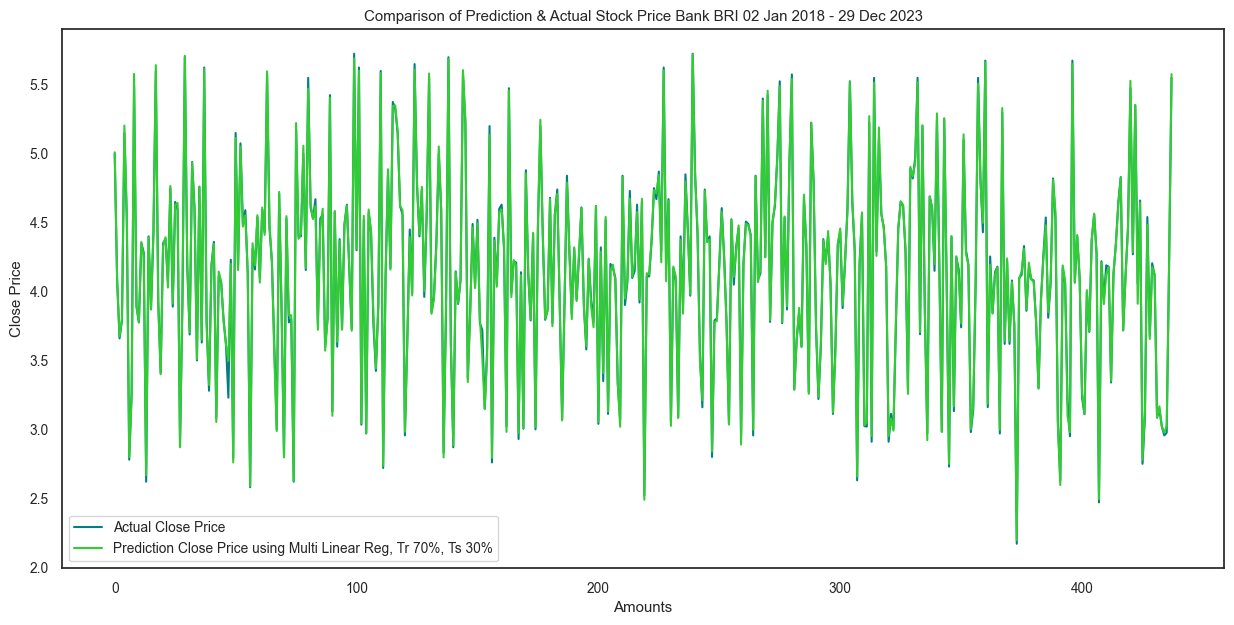

In [65]:
plt.figure(figsize=(15,7))
sns.set_theme(style='white',font_scale=0.9)

plt.plot(inversed_scaled_Y_test,color='teal',label='Actual Close Price')
plt.plot(inversed_scaled_Y_Estimasi,color='limegreen',label='Prediction Close Price using Multi Linear Reg, Tr 70%, Ts 30%')
plt.xlabel('Amounts')
plt.ylabel('Close Price')
plt.legend()
plt.title('Comparison of Prediction & Actual Stock Price Bank BRI 02 Jan 2018 - 29 Dec 2023')

plt.show()

#### (Trial) Head-to Head Prediction w/ Datetime

In [66]:
ytest_reshape = ytest.reshape(-1,1)

In [67]:
ytest_reshape

array([[0.79606188],
       [0.53727145],
       [0.41912799],
       [0.4556962 ],
       [0.83825598],
       [0.66104079],
       [0.17158931],
       [0.30942335],
       [0.93670886],
       [0.4838256 ],
       [0.45175809],
       [0.61350211],
       [0.59437412],
       [0.12658228],
       [0.62728551],
       [0.47819972],
       [0.63009845],
       [0.96483826],
       [0.49507736],
       [0.3488045 ],
       [0.61322082],
       [0.62165963],
       [0.53445851],
       [0.7257384 ],
       [0.4838256 ],
       [0.697609  ],
       [0.68213783],
       [0.204782  ],
       [0.48945148],
       [0.99296765],
       [0.56540084],
       [0.42700422],
       [0.77918425],
       [0.68635724],
       [0.37412096],
       [0.72855134],
       [0.41068917],
       [0.9718706 ],
       [0.4556962 ],
       [0.31223629],
       [0.56962025],
       [0.61603376],
       [0.25682138],
       [0.54571027],
       [0.53445851],
       [0.45850914],
       [0.40787623],
       [0.298

In [68]:
inversed_scaled_Y_test 

array([5.   , 4.08 , 3.66 , 3.79 , 5.15 , 4.52 , 2.78 , 3.27 , 5.5  ,
       3.89 , 3.776, 4.351, 4.283, 2.62 , 4.4  , 3.87 , 4.41 , 5.6  ,
       3.93 , 3.41 , 4.35 , 4.38 , 4.07 , 4.75 , 3.89 , 4.65 , 4.595,
       2.898, 3.91 , 5.7  , 4.18 , 3.688, 4.94 , 4.61 , 3.5  , 4.76 ,
       3.63 , 5.625, 3.79 , 3.28 , 4.195, 4.36 , 3.083, 4.11 , 4.07 ,
       3.8  , 3.62 , 3.23 , 4.23 , 2.79 , 5.15 , 4.176, 5.075, 4.49 ,
       4.59 , 4.13 , 2.58 , 4.31 , 4.16 , 4.54 , 4.1  , 4.595, 4.43 ,
       5.575, 4.459, 4.215, 3.6  , 3.   , 4.71 , 3.86 , 2.81 , 4.53 ,
       3.776, 3.8  , 2.62 , 5.175, 4.4  , 4.4  , 5.   , 4.156, 5.55 ,
       4.61 , 4.53 , 4.67 , 3.77 , 4.53 , 4.556, 3.6  , 3.8  , 5.425,
       3.13 , 4.58 , 3.6  , 4.38 , 3.73 , 4.49 , 4.63 , 4.16 , 3.73 ,
       5.725, 4.3  , 5.625, 3.034, 4.52 , 2.97 , 4.57 , 4.43 , 3.75 ,
       3.424, 3.893, 5.6  , 2.72 , 4.11 , 4.85 , 4.17 , 5.375, 5.325,
       5.15 , 4.62 , 4.56 , 2.956, 3.66 , 4.45 , 3.99 , 5.65 , 4.77 ,
       4.4  , 4.74 ,

In [69]:
inversed_scaled_Y_Estimasi

array([5.01033015, 4.07915119, 3.67443686, 3.80306358, 5.20402394,
       4.57176005, 2.79976541, 3.23576698, 5.57882227, 3.8945945 ,
       3.77677508, 4.35909585, 4.24886044, 2.66826632, 4.3922047 ,
       3.87282413, 4.43115577, 5.6421482 , 3.90246821, 3.39951688,
       4.3295664 , 4.39370987, 4.02876415, 4.76563179, 3.91464757,
       4.62940506, 4.64238253, 2.86988451, 3.96270383, 5.71043145,
       4.19559855, 3.70479133, 4.93451296, 4.59263873, 3.51032879,
       4.76104213, 3.65061166, 5.61424816, 3.75405405, 3.3220925 ,
       4.17661125, 4.34537991, 3.05357739, 4.14452388, 4.07401187,
       3.7890312 , 3.61727767, 3.49763806, 4.20011407, 2.759853  ,
       5.11304089, 4.15577651, 5.04999673, 4.47113426, 4.55217666,
       4.14131173, 2.58783159, 4.35017138, 4.18977967, 4.55396361,
       4.0643651 , 4.60950499, 4.41102855, 5.59713241, 4.49389461,
       4.21447773, 3.52158526, 2.98761647, 4.72270679, 3.88116754,
       2.79647105, 4.54677752, 3.8269713 , 3.8284681 , 2.62630

#### Prediksi Multi Lin. Reg (2)

In [70]:
pred_lin_reg_dua = regresor.predict(scaled_X)

pred_lin_reg_dua

array([[0.99065439],
       [0.99883848],
       [0.98174779],
       ...,
       [0.37109884],
       [0.39582594],
       [0.41648711]])

In [71]:
inv_pred_lin_reg_dua = min_max_scaler.inverse_transform(pred_lin_reg_dua)

inv_pred_lin_reg_dua

array([[5.69177637],
       [5.7208708 ],
       [5.66011341],
       ...,
       [3.48925637],
       [3.5771612 ],
       [3.65061166]])

In [72]:
data_pred_dua = {'Prediction Price':inv_pred_lin_reg_dua,'Actual Price':inversed_scaled_Y_test}
comparing_dua = pd.DataFrame(data_pred)

comparing_dua.head()

,Prediction Price,Actual Price
0,5.010330,5.00
1,4.079151,4.08
2,3.674437,3.66
3,3.803064,3.79
4,5.204024,5.15


In [73]:
ytest_reshape = ytest_reshape.reshape(-1)

ytest_reshape

array([0.79606188, 0.53727145, 0.41912799, 0.4556962 , 0.83825598,
       0.66104079, 0.17158931, 0.30942335, 0.93670886, 0.4838256 ,
       0.45175809, 0.61350211, 0.59437412, 0.12658228, 0.62728551,
       0.47819972, 0.63009845, 0.96483826, 0.49507736, 0.3488045 ,
       0.61322082, 0.62165963, 0.53445851, 0.7257384 , 0.4838256 ,
       0.697609  , 0.68213783, 0.204782  , 0.48945148, 0.99296765,
       0.56540084, 0.42700422, 0.77918425, 0.68635724, 0.37412096,
       0.72855134, 0.41068917, 0.9718706 , 0.4556962 , 0.31223629,
       0.56962025, 0.61603376, 0.25682138, 0.54571027, 0.53445851,
       0.45850914, 0.40787623, 0.29817159, 0.57946554, 0.17440225,
       0.83825598, 0.56427567, 0.81715893, 0.65260197, 0.68073136,
       0.55133615, 0.11533052, 0.60196906, 0.55977496, 0.66666667,
       0.54289733, 0.68213783, 0.63572433, 0.95780591, 0.64388186,
       0.57524613, 0.40225035, 0.23347398, 0.71448664, 0.47538678,
       0.18002813, 0.66385373, 0.45175809, 0.45850914, 0.12658

In [74]:
pred_lin_reg_dua = pred_lin_reg_dua.reshape(-1)

pred_lin_reg_dua

array([0.99065439, 0.99883848, 0.98174779, ..., 0.37109884, 0.39582594,
       0.41648711])

In [75]:
df_y_test = pd.DataFrame({'Real Value':Y_scaled})
df_pred = pd.DataFrame({'Prediction':pred_lin_reg_dua})

In [76]:
df_y_test

,Real Value
0,1.000000
1,1.000000
2,0.971871
3,0.985935
4,0.957806
...,...
1454,0.399437
1455,0.399437
1456,0.388186
1457,0.405063


In [77]:
df_pred

,Prediction
0,0.990654
1,0.998838
2,0.981748
3,0.978811
4,0.956667
...,...
1454,0.394132
1455,0.391127
1456,0.371099
1457,0.395826


In [78]:
combined = pd.concat([df['Tanggal'],df_y_test,df_pred],axis=1)
combined.columns = ['Date','Actual','Prediction']

In [79]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

In [80]:
combined['Diff'] = (combined['Actual']-combined['Prediction']).abs()

In [81]:
combined

,Date,Actual,Prediction,Diff
0,2023-12-29,1.000000,0.990654,0.009346
1,2023-12-28,1.000000,0.998838,0.001162
2,2023-12-27,0.971871,0.981748,0.009877
3,2023-12-22,0.985935,0.978811,0.007124
4,2023-12-21,0.957806,0.956667,0.001139
...,...,...,...,...
1454,2018-08-01,0.399437,0.394132,0.005305
1455,2018-05-01,0.399437,0.391127,0.008310
1456,2018-04-01,0.388186,0.371099,0.017087
1457,2018-03-01,0.405063,0.395826,0.009237


In [82]:
inv_pred_lin_reg_dua = inv_pred_lin_reg_dua.reshape(-1)

inv_pred_lin_reg_dua

array([5.69177637, 5.7208708 , 5.66011341, ..., 3.48925637, 3.5771612 ,
       3.65061166])

In [83]:
type(inv_pred_lin_reg_dua)

numpy.ndarray

In [84]:
df_pred_lin_reg_dua = pd.DataFrame({'Prediction MLR':inv_pred_lin_reg_dua})

df_pred_lin_reg_dua

,Prediction MLR
0,5.691776
1,5.720871
2,5.660113
3,5.649674
4,5.570951
...,...
1454,3.571141
1455,3.560458
1456,3.489256
1457,3.577161


In [85]:
df = df.merge(df_pred_lin_reg_dua,how='left',left_index=True,right_index=True)

df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Deviasi,Return,Hari,Bulan,Tahun,Prediction MLR
0,2023-12-29,5.725,5.75,5.750,5.675,93.13,0.00,0.025,0.004367,29,12,2023,5.691776
1,2023-12-28,5.725,5.70,5.750,5.675,121.43,1.78,-0.025,-0.004367,28,12,2023,5.720871
2,2023-12-27,5.625,5.70,5.725,5.625,131.37,-0.88,0.075,0.013333,27,12,2023,5.660113
3,2023-12-22,5.675,5.65,5.700,5.600,109.41,1.79,-0.025,-0.004405,22,12,2023,5.649674
4,2023-12-21,5.575,5.55,5.600,5.525,99.05,0.45,-0.025,-0.004484,21,12,2023,5.570951
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2018-08-01,3.590,3.59,3.590,3.560,54.56,0.00,0.000,0.000000,1,8,2018,3.571141
1455,2018-05-01,3.590,3.55,3.590,3.520,87.10,1.13,-0.040,-0.011142,1,5,2018,3.560458
1456,2018-04-01,3.550,3.61,3.610,3.460,156.41,-1.66,0.060,0.016901,1,4,2018,3.489256
1457,2018-03-01,3.610,3.63,3.630,3.560,70.15,-0.55,0.020,0.005540,1,3,2018,3.577161


In [86]:
# df.drop(columns='Prediction MLR_x',axis=1,inplace=True)
# df.drop(columns='Prediction MLR_y',axis=1,inplace=True)

In [87]:
combined.isnull().sum()

Date          0
Actual        0
Prediction    0
Diff          0
dtype: int64

In [88]:
combined

,Date,Actual,Prediction,Diff
0,2023-12-29,1.000000,0.990654,0.009346
1,2023-12-28,1.000000,0.998838,0.001162
2,2023-12-27,0.971871,0.981748,0.009877
3,2023-12-22,0.985935,0.978811,0.007124
4,2023-12-21,0.957806,0.956667,0.001139
...,...,...,...,...
1454,2018-08-01,0.399437,0.394132,0.005305
1455,2018-05-01,0.399437,0.391127,0.008310
1456,2018-04-01,0.388186,0.371099,0.017087
1457,2018-03-01,0.405063,0.395826,0.009237


In [89]:
combined['Date']

0      2023-12-29
1      2023-12-28
2      2023-12-27
3      2023-12-22
4      2023-12-21
          ...    
1454   2018-08-01
1455   2018-05-01
1456   2018-04-01
1457   2018-03-01
1458   2018-02-01
Name: Date, Length: 1459, dtype: datetime64[ns]

In [90]:
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Deviasi,Return,Hari,Bulan,Tahun,Prediction MLR
0,2023-12-29,5.725,5.75,5.750,5.675,93.13,0.00,0.025,0.004367,29,12,2023,5.691776
1,2023-12-28,5.725,5.70,5.750,5.675,121.43,1.78,-0.025,-0.004367,28,12,2023,5.720871
2,2023-12-27,5.625,5.70,5.725,5.625,131.37,-0.88,0.075,0.013333,27,12,2023,5.660113
3,2023-12-22,5.675,5.65,5.700,5.600,109.41,1.79,-0.025,-0.004405,22,12,2023,5.649674
4,2023-12-21,5.575,5.55,5.600,5.525,99.05,0.45,-0.025,-0.004484,21,12,2023,5.570951
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2018-08-01,3.590,3.59,3.590,3.560,54.56,0.00,0.000,0.000000,1,8,2018,3.571141
1455,2018-05-01,3.590,3.55,3.590,3.520,87.10,1.13,-0.040,-0.011142,1,5,2018,3.560458
1456,2018-04-01,3.550,3.61,3.610,3.460,156.41,-1.66,0.060,0.016901,1,4,2018,3.489256
1457,2018-03-01,3.610,3.63,3.630,3.560,70.15,-0.55,0.020,0.005540,1,3,2018,3.577161


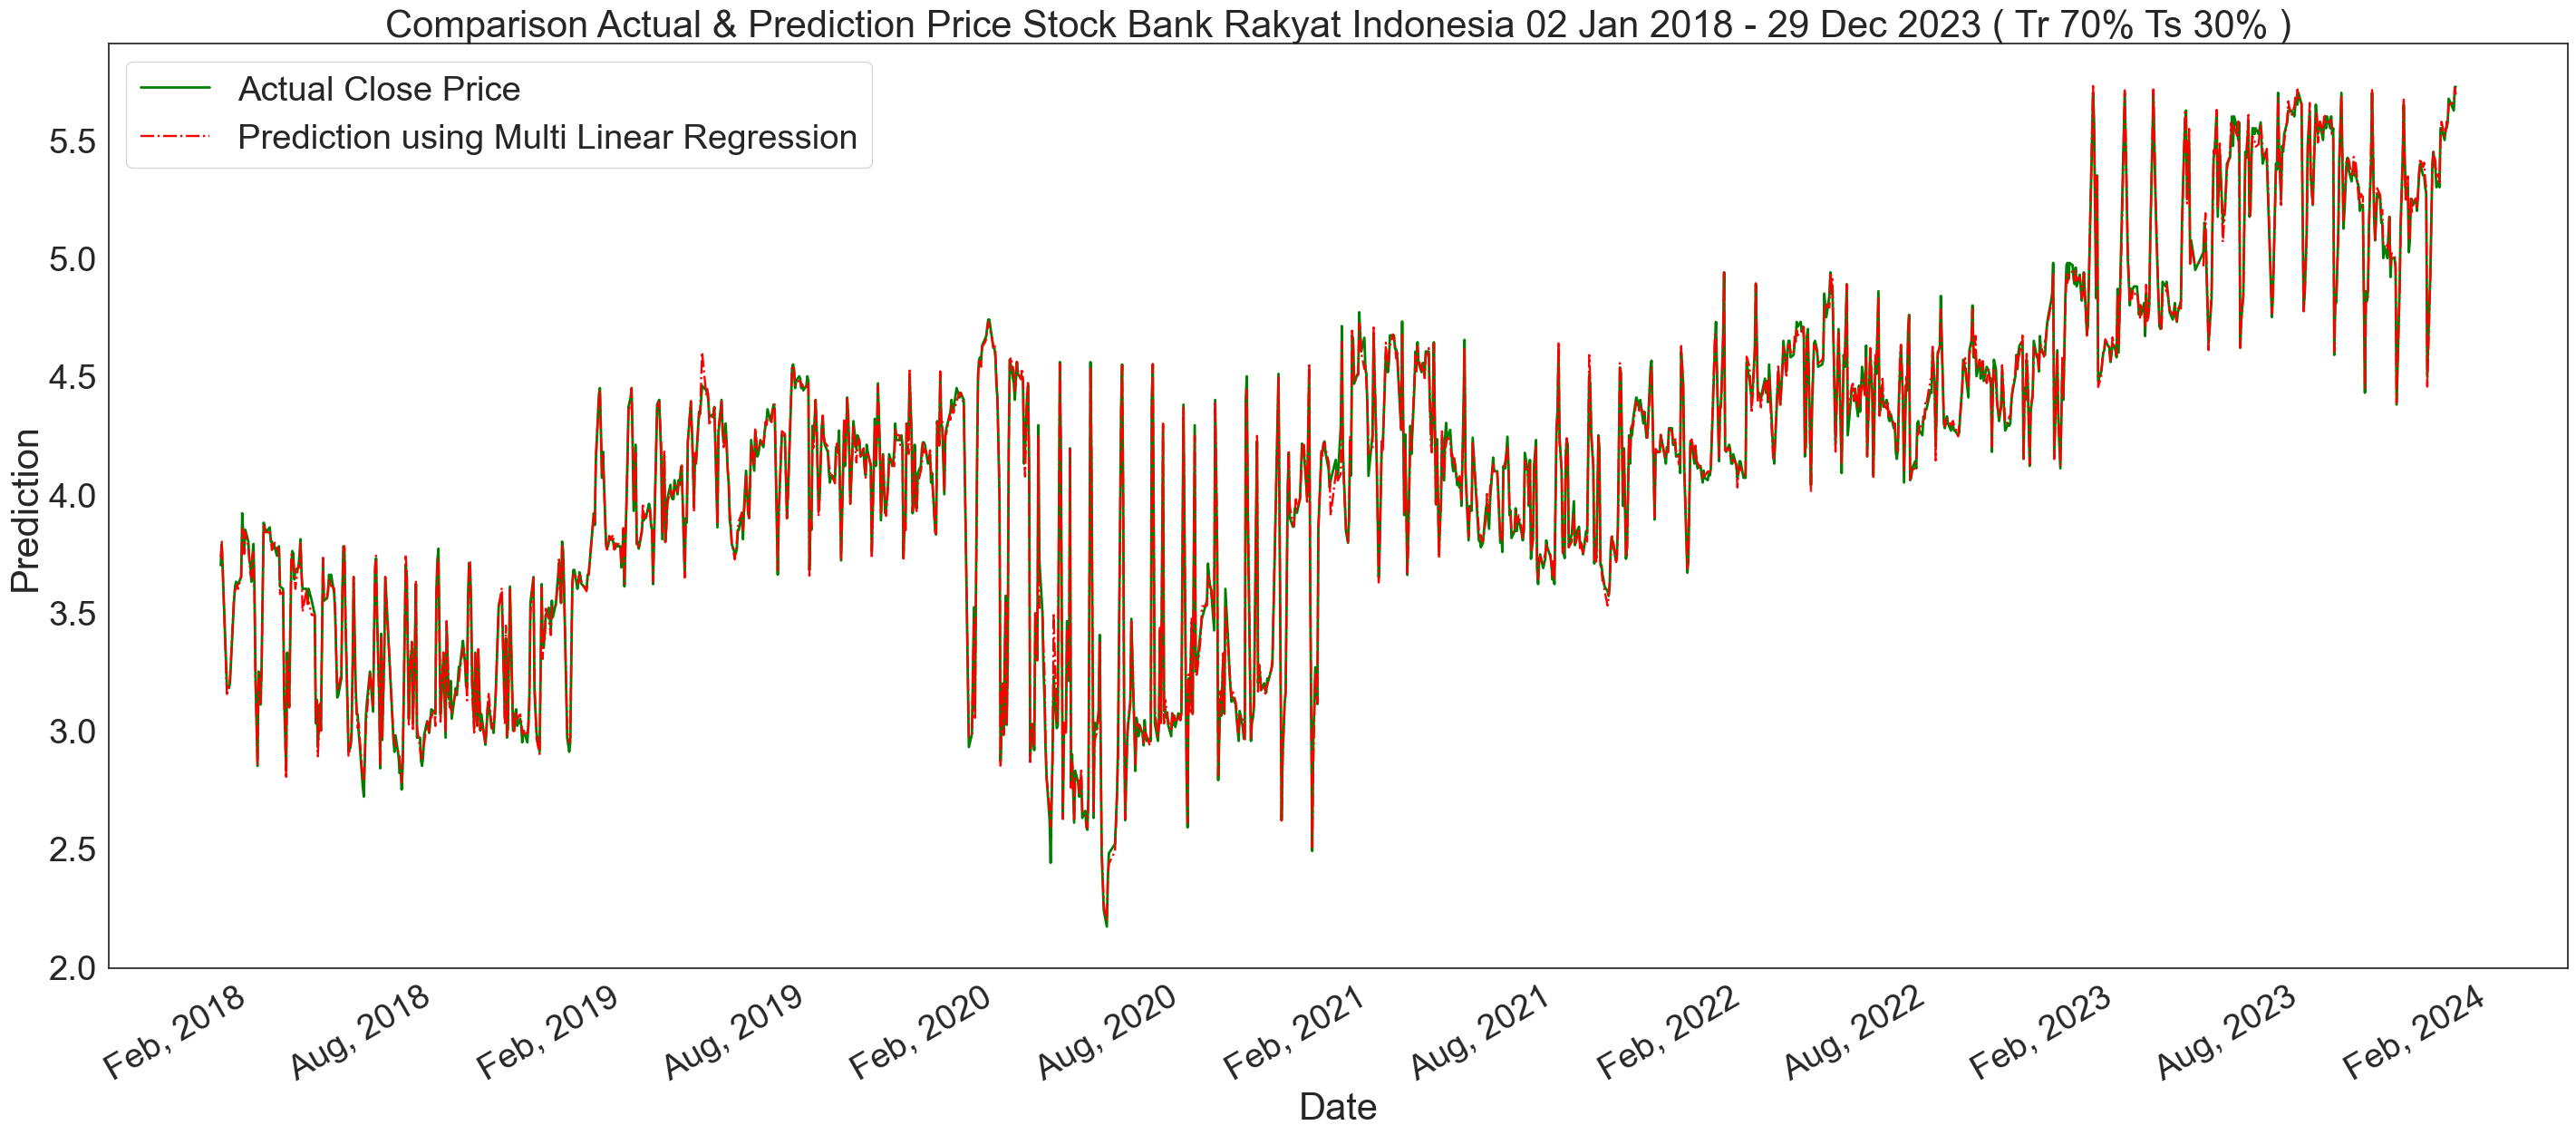

In [92]:
half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m")
month_year_formatter = mdates.DateFormatter('%b, %Y')

fig,ax = plt.subplots(figsize=(35,15))
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.xaxis.set_major_formatter(month_year_formatter)

fig.autofmt_xdate()

# plt.figure(figsize=(25,7))
sns.set_theme(style='white',font_scale=2.5)


sns.lineplot(x=df['Tanggal'],y=df['Terakhir'],data=df,linestyle='solid',color='green',linewidth=2.0,label='Actual Close Price')

sns.lineplot(x=df['Tanggal'],y=df['Prediction MLR'],data=df,linestyle='dashdot',color='red',linewidth=1.7,label='Prediction using Multi Linear Regression')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Prediction')
plt.title('Comparison Actual & Prediction Price Stock Bank Rakyat Indonesia 02 Jan 2018 - 29 Dec 2023 ( Tr 70% Ts 30% )')

plt.show()
